# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


# Loading the dataset

**Reading the dataset**

In [2]:
df = pd.read_csv("C:/Users/Himanshu/Desktop/data/Mall_customers.csv",index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.shape

(200, 4)

In [5]:
df.tail(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


# Checking Co-relation

In [6]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

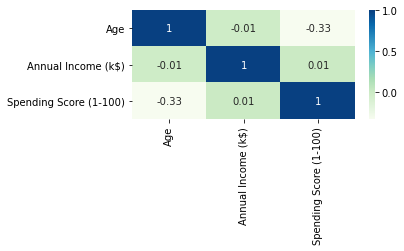

In [7]:
plt.figure(figsize=(5, 2))
sns.heatmap(round(df[numerical_features].corr(), 2),mask=None, annot=True, cmap='GnBu')
corr_mat = df[numerical_features].corr()
plt.show()

# Checking for null values

In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

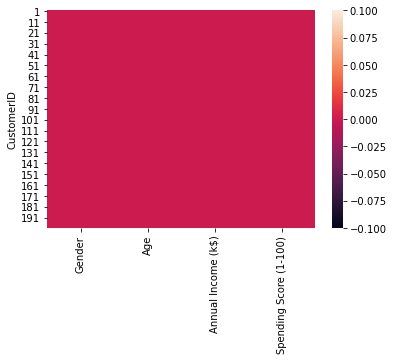

In [9]:
sns.heatmap(df.isnull());

# Exploring the Data

In [10]:
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


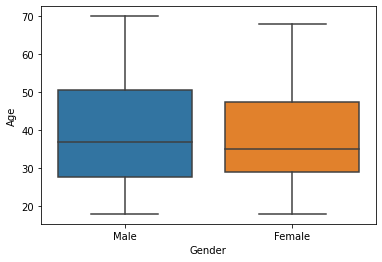

In [11]:
sns.boxplot(x='Gender', y='Age',data=df)

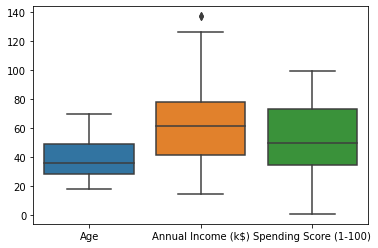

In [12]:
sns.boxplot(data=df)

Quartile calculations

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [15]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                       0
Annual Income (k$)        2
Gender                    0
Spending Score (1-100)    0
dtype: int64

# Handling Categorical Features

In [16]:
one_hot_encoded_data = pd.get_dummies(df,columns=['Gender'])
one_hot_encoded_data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0
...,...,...,...,...,...
196,35,120,79,1,0
197,45,126,28,1,0
198,32,126,74,0,1


In [17]:
one_hot_encoded_data.drop(['Gender_Female'],axis=1,inplace=True)
one_hot_encoded_data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


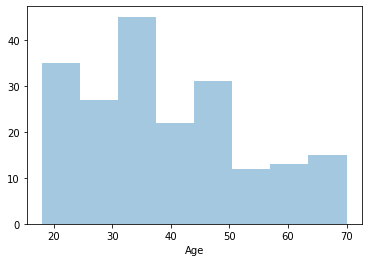

In [19]:
sns.distplot(one_hot_encoded_data['Age'],kde=False)
plt.show()

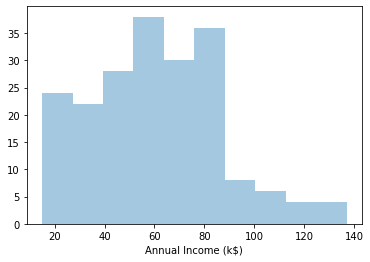

In [20]:
sns.distplot(one_hot_encoded_data['Annual Income (k$)'],kde=False)
plt.show()

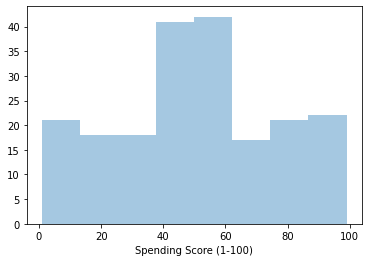

In [50]:
sns.distplot(one_hot_encoded_data['Spending Score (1-100)'],kde=False)
plt.show()

# K-Means Clustering

**KMeans clustering algorithm groups the dataset into 'k' number of clusters, and the data belonging to each cluster have similar properties. Finding the 'k' value can be done in two ways- 1.WCSS (inertia) 2.Elbow Method**

In [22]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


WCSS

In [23]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972,
 17602.190468386776,
 16019.406429681436,
 14666.474696940497,
 13075.246656284893]

**Elbow Graph**

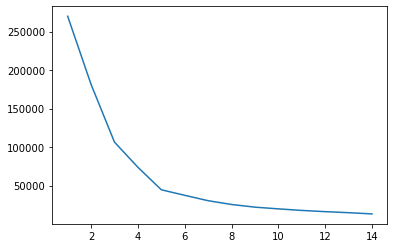

In [25]:
plt.plot(range(1,15),wcss)

There is a steep decline at (5.0,50000) --> hence let us choose a k value 5.0. As we got k= 5 from the graph (let us build model with 5 clusters)

**MODEL BUILDING**

In [26]:
km = KMeans(n_clusters=5,init='k-means++',random_state=42)

**MODEL FITTING**

In [27]:
km.fit_predict(x)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Model fitting now has labelled all the rows into our 5 clusters category, i.e, cluster number 0 to 4

In [28]:
x['cluster_num'] = km.fit_predict(x)

<ipython-input-28-396d543708f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster_num'] = km.fit_predict(x)


In [29]:
x

,Annual Income (k$),Spending Score (1-100),cluster_num
CustomerID,,,
1,15,39,3
2,15,81,0
3,16,6,3
4,16,77,0
5,17,40,3
...,...,...,...
196,120,79,2
197,126,28,4
198,126,74,2


In [30]:
x[x['cluster_num'] == 4]

,Annual Income (k$),Spending Score (1-100),cluster_num
CustomerID,,,
125,70,29,4
129,71,11,4
131,71,9,4
135,73,5,4
137,73,7,4
139,74,10,4
141,75,5,4
145,77,12,4
147,77,36,4


In [31]:
x[x['cluster_num'] == 0]

,Annual Income (k$),Spending Score (1-100),cluster_num
CustomerID,,,
2,15,81,0
4,16,77,0
6,17,76,0
8,18,94,0
10,19,72,0
12,19,99,0
14,20,77,0
16,20,79,0
18,21,66,0


INFERENCE: The similarity between the data points in the cluster 0 as we can see is that the SPENDING SCORE IS HIGH. Similarly, each cluster datapoints have similarity between the elements in the cluster

**MODEL PREDICTION**

In [32]:
km.predict([[39,65]])

array([0])

**With Annual income =39 and spending score = 65. Our model has predicted Cluster 0 which is same as expected (from the table)**

# 2. DBSCAN

**DBSCAN algorithm is another clustering algorithm which is used to find the number of clusters and also used to find OUTLIERS additionally. Its advantage over the KMeans is that this doesn't have to find the no. of clusters beforehand- Hence model training can be performed even without knowing the 'k' value**

**Importing Library**

In [33]:
from sklearn.cluster import DBSCAN

**MODEL BUILDING**

**DBSCAN model requires 2 important parameters - eps (which is the radius of the cluster) and the min_samples which is the minimum number of data points within each cluster**

In [34]:
dbscan = DBSCAN(eps=0.7,min_samples=3)

**MODEL FITTING**

In [35]:
dbscan.fit(x[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=0.7, min_samples=3)

**FINDING OUTLIERS**

In [38]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

**All the values have -1 as output which symbolifies outliers . Since all are outliers in our model,we should change our radius (eps value) such that we can form clusters. Let us rebuild our model by increasing our radius**

**MODEL REBUILDING**

In [39]:
dbscan = DBSCAN(eps=5,min_samples=4)

**MODEL REFITTING**

In [40]:
dbscan.fit(x[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=5, min_samples=4)

**FINDING OUTLIERS IN OUR NEW MODEL**

In [41]:
dbscan.labels_ 

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

**We can now see some changes. Eventhough our new model has a few outliers we can see that clusters are formed between 0 to 6. Hence 7 number of clusters are totally formed**

In [42]:
x1 = x[['Annual Income (k$)','Spending Score (1-100)']]
x1['dbscan_cluster_name'] = dbscan.labels_   
x1

,Annual Income (k$),Spending Score (1-100),dbscan_cluster_name
CustomerID,,,
1,15,39,-1
2,15,81,0
3,16,6,-1
4,16,77,0
5,17,40,-1
...,...,...,...
196,120,79,-1
197,126,28,-1
198,126,74,-1


In [43]:
x

,Annual Income (k$),Spending Score (1-100),cluster_num
CustomerID,,,
1,15,39,3
2,15,81,0
3,16,6,3
4,16,77,0
5,17,40,3
...,...,...,...
196,120,79,2
197,126,28,4
198,126,74,2


In [44]:
x1

,Annual Income (k$),Spending Score (1-100),dbscan_cluster_name
CustomerID,,,
1,15,39,-1
2,15,81,0
3,16,6,-1
4,16,77,0
5,17,40,-1
...,...,...,...
196,120,79,-1
197,126,28,-1
198,126,74,-1


**TRUE AND PREDICTED LABELS**

In [45]:
true_label = x['cluster_num']
predicted_label = x1['dbscan_cluster_name'] 

# METRICS

**IMPORTING LIBRARY**

In [46]:
from sklearn import metrics

In [47]:

metrics.adjusted_rand_score(true_label,predicted_label)

0.5641095154835344

**HOMOGENEITY SCORE**

In [48]:
metrics.homogeneity_score(true_label,predicted_label)

0.6007983436060925